In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
try:
    import pcmdpy_gpu as ppy
except:
    import pcmdpy as ppy
from tqdm import tqdm
%matplotlib inline

In [2]:
import easydarkfigs
%set_lightfigdir figures/
%set_darkfigdir figures_dark/

In [3]:
filters = ppy.instrument.default_m31_filters()
iso_model = ppy.isochrones.Isochrone_Model(filters, mag_system='ab')
driv = ppy.driver.Driver(iso_model, gpu=ppy.gpu_utils._GPU_ACTIVE)

Please wait while the GPU states are initialized

In [4]:
gal1 = ppy.galaxy.CustomGalaxy(
    ppy.metalmodels.SingleFeH(), 
    ppy.dustmodels.SingleDust(dust_frac=0.5),
    ppy.sfhmodels.TauModel(),
    ppy.distancemodels.VariableDistance(),
)

In [6]:
p = {}
p[0] = np.array([-0.5, -0.5, 3.0, 3.0, 25.0])
p[1] = p[0] + np.array([0.5, 0., 0., 0., 0.])
p[2] = p[0] + np.array([-0.5, 0., 0., 0., 0.])
p[3] = p[0] + np.array([0., 0.5, 0., 0., 0.])
p[4] = p[0] + np.array([0., -0.5, 0., 0., 0.])
p[5] = p[0] + np.array([0., 0., 0., 9.0, 0.])
p[6] = p[0] + np.array([0., 0., 0., -2.0, 0.])
p[7] = p[0] + np.array([0., 0., 0.5, 0., 0.])
p[8] = p[0] + np.array([0., 0., -0.5, 0., 0.])
p[9] = p[0] + np.array([0., 0., 0., 0., -1.25])
p[10] = p[0] + np.array([0., 0., 0., 0., +1.25])

In [7]:
if ppy.gpu_utils._GPU_ACTIVE:
    Nim = 1024
else:
    print('Warning: Using CPU only')
    Nim = 128
pcmds = {}
for i in tqdm(range(0, 11)):
    if i <= 10:
        g = gal1
    elif i == 11:
        g = gal2
    elif i == 12:
        g = gal3
    g.set_params(p[i])
    pcmds[i] = driv.simulate(g, Nim, shot_noise=False)[0]

100%|██████████| 11/11 [00:28<00:00,  2.53s/it]


In [8]:
# sig_feh = 0.5
# p[11] = np.array([p[0][0], sig_feh, p[0][1], p[0][2], p[0][3], p[0][4]])
# sig_dust = 1.0
# p[12] = np.array([p[0][0], p[0][1], sig_dust, p[0][2], p[0][3], p[0][4]])

In [9]:
# for i in tqdm(range(11, 13)):
#     if i == 11:
#         g = gal2
#     elif i == 12:
#         g = gal3
#     g.set_params(p[i])
#     pcmds[i] = driv.simulate(g, Nim, shot_noise=False)[0]

In [10]:
titles = {}
titles[0] = 'Baseline Model'
titles[1] = '[Fe/H] + 0.5'
titles[2] = '[Fe/H] - 0.5'
titles[3] = '$\log$ E(B-V) + 0.5'
titles[4] = '$\log$ E(B-V) - 0.5'
titles[5] = r'$\tau$ x 3'
titles[6] = r'$\tau$ x 1/3'
titles[7] = r'$\log \mathrm{N_{pix}}$ + 0.5'
titles[8] = r'$\log \mathrm{N_{pix}}$ - 0.5'
titles[9] = r'$\mu_d$ - 1.25'
titles[10] = r'$\mu_d$ + 1.25'
# titles[11] = r'$\sigma_\mathrm{[Fe/H]}$ = ' + '{:.1f}'.format(sig_feh)
# titles[12] = r'$\sigma_\mathrm{dust}$ = ' + '{:.1f}'.format(sig_dust)

Saving light figure as figures/paper1/param_variance_1.pdf
Saving dark figure as figures_dark/paper1/param_variance_1_dark.pdf


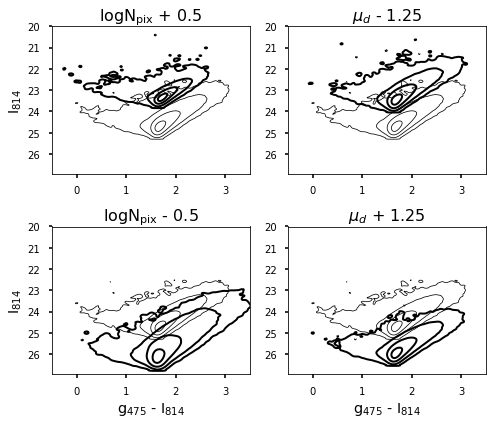

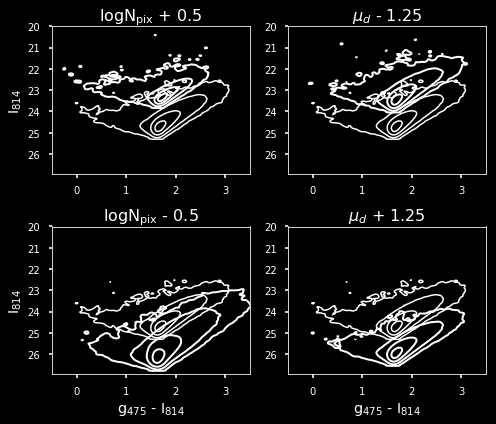

In [15]:
%%savefig_dark_light paper1/param_variance_1.pdf
f, axes = plt.subplots(figsize=(7, 6), ncols=2, nrows=2, sharex=False, sharey=False)
axes = axes.T.flatten()
bins = [np.arange(20, 27, 0.05), np.arange(-0.5, 3.51, 0.05)]

# model_text = r"""Baseline Model:
# [Fe/H] = -0.5
# $\log$ E(B-V) = -0.5
# $\tau$ = 3 Gyr
# $\mathrm{N_{pix}}$ = 10$^3$
# $\mu$ = 25.0
# """

# axes[0].axis('off')
# axes[0].text(1.5, 21, model_text, verticalalignment='top', horizontalalignment='center',
#             fontsize=18)

# ppy.plotting.plot_pcmd_contours(pcmds[0], ax=axes[1])

for i, a in enumerate(axes):
    ppy.plotting.plot_pcmd_contours(pcmds[0], ax=a,
                                    contour_kwargs={'linewidths': (1.5 if is_dark else .75)})
    ppy.plotting.plot_pcmd_contours(pcmds[i+7], ax=a)
    ppy.plotting.plot_isochrone(iso_model, dmod=25.0, axes=a, zorder=-1, alpha=0.)
    a.set_aspect('auto')
    if i not in [0, 1]:
        a.set_ylabel('')
#         plt.setp(a.get_yticklabels(), visible=False)
    if i not in [1,3]:
        a.set_xlabel('')
#         plt.setp(a.get_xticklabels(), visible=False)
    a.set_title(titles[i+7])
    a.set_ybound([bins[0][0], bins[0][-1]])
    a.set_xbound([bins[1][0], bins[1][-1]])
plt.tight_layout()

Saving light figure as figures/paper1/param_variance_2.pdf
Saving dark figure as figures_dark/paper1/param_variance_2_dark.pdf


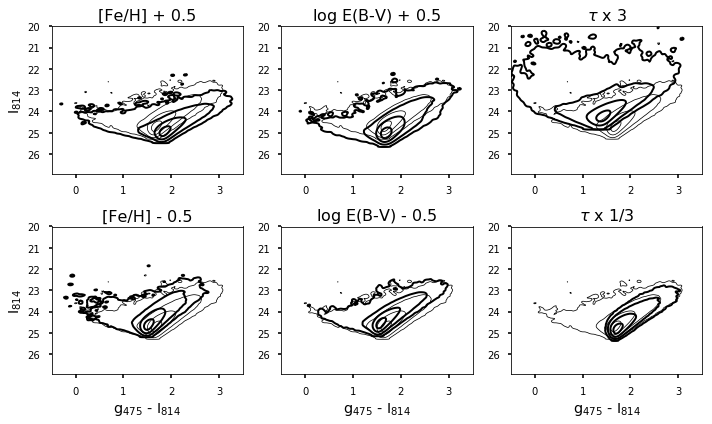

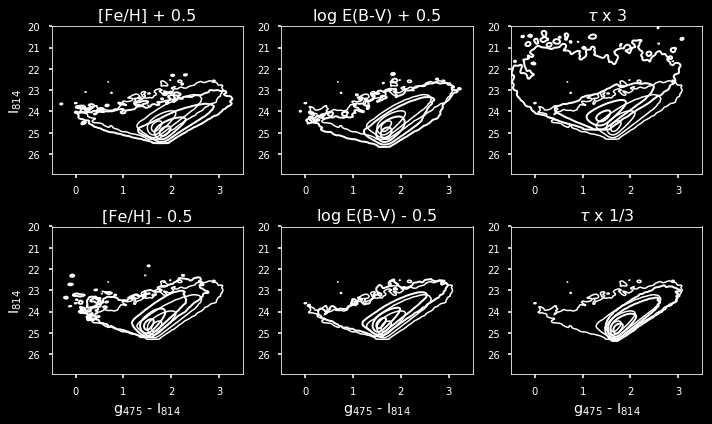

In [13]:
%%savefig_dark_light paper1/param_variance_2.pdf
f, axes = plt.subplots(figsize=(10, 6), ncols=3, nrows=2, sharex=False, sharey=False)
axes = axes.T.flatten()
bins = [np.arange(20, 27, 0.05), np.arange(-0.5, 3.51, 0.05)]

# model_text = r"""Baseline Model:
# [Fe/H] = -0.5
# $\log$ E(B-V) = -0.5
# $\tau$ = 3 Gyr
# $\mathrm{N_{pix}}$ = 10$^3$
# $\mu$ = 25.0
# """

# axes[0].axis('off')
# axes[0].text(1.5, 21, model_text, verticalalignment='top', horizontalalignment='center',
#             fontsize=18)

# ppy.plotting.plot_pcmd_contours(pcmds[0], ax=axes[1])

for i, a in enumerate(axes):
    ppy.plotting.plot_pcmd_contours(pcmds[0], ax=a,
                                    contour_kwargs={'linewidths': (1.5 if is_dark else .75)})
    ppy.plotting.plot_pcmd_contours(pcmds[i+1], ax=a)
    ppy.plotting.plot_isochrone(iso_model, dmod=25.0, axes=a, zorder=-1, alpha=0.)
    a.set_aspect('auto')
    if i not in [0, 1]:
        a.set_ylabel('')
#         plt.setp(a.get_yticklabels(), visible=False)
    if i not in [1,3,5]:
        a.set_xlabel('')
#         plt.setp(a.get_xticklabels(), visible=False)
    a.set_title(titles[i+1])
    a.set_ybound([bins[0][0], bins[0][-1]])
    a.set_xbound([bins[1][0], bins[1][-1]])
plt.tight_layout()